In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification-dataset/heart disease classification dataset.csv


# Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
%matplotlib inline 

# Loading the data


In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-classification-dataset/heart disease classification dataset.csv")
df.describe()
df.shape

(303, 15)

# Exploring the data


In [4]:
df.head()


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [5]:
df.isnull().any()

Unnamed: 0    False
age           False
sex           False
cp            False
trestbps       True
chol           True
fbs           False
restecg       False
thalach        True
exang         False
oldpeak       False
slope         False
ca            False
thal          False
target        False
dtype: bool

Fix the columns that have null values

In [6]:
df['chol'].value_counts()
df['trestbps'].value_counts()
df['thalach'].value_counts()
        
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['thalach'] = df['thalach'].fillna(df['trestbps'].mean())
df.isnull().any()

Unnamed: 0    False
age           False
sex           False
cp            False
trestbps      False
chol          False
fbs           False
restecg       False
thalach       False
exang         False
oldpeak       False
slope         False
ca            False
thal          False
target        False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


# Check for outliers


In [8]:
df['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

In [9]:
df['sex'].describe()
df['sex_num'] = np.zeros([len(df['sex']),1])
for i in range(0,len(df['sex'])):
    if df.loc[i, 'sex'] == 'male':
       # df['sex_num'][i] = 1
        df.loc[i, 'sex_num'] = 1
        

df['target_num'] = np.zeros([len(df['target']),1])
for i in range(0,len(df['target'])):
    if df.loc[i, 'target'] == 'yes':
       # df['sex_num'][i] = 1
        df.loc[i, 'target_num'] = 1

In [10]:
df['sex_num'].value_counts()
#df.dtypes['sex']
df = df.drop(columns = ["sex"])

df = df.drop(columns = ["target"])

Unnamed: 0
age
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
sex_num
target_num


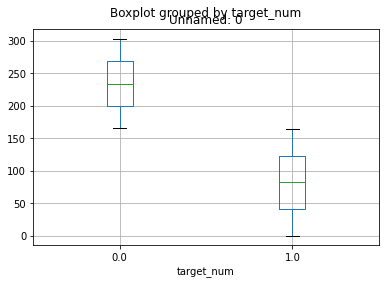

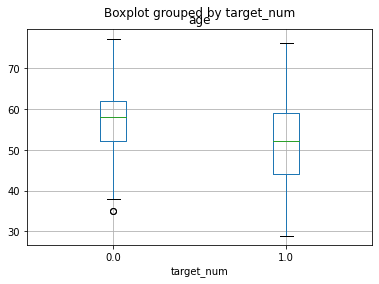

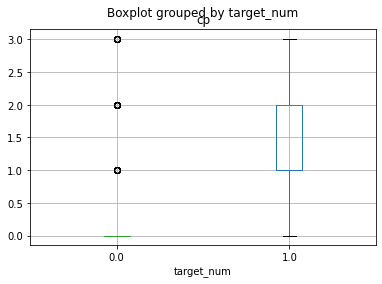

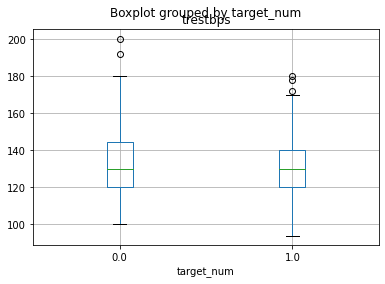

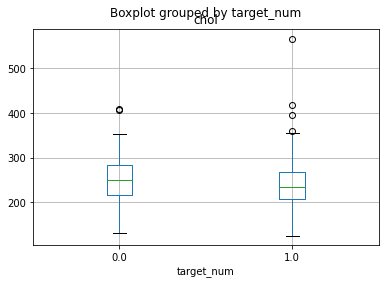

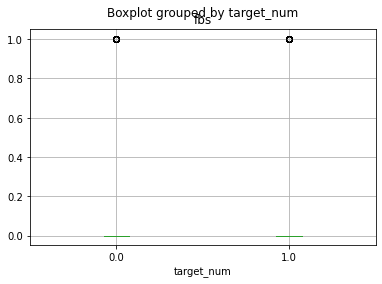

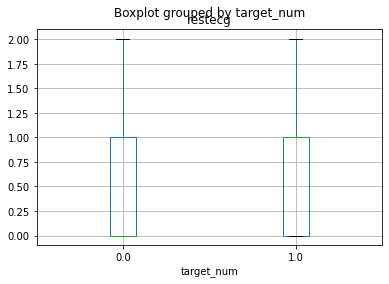

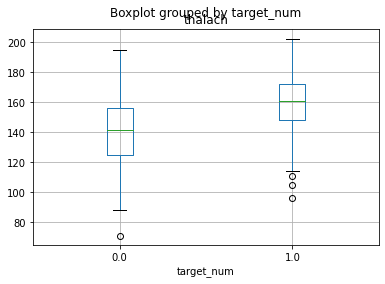

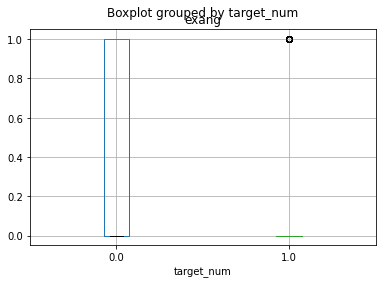

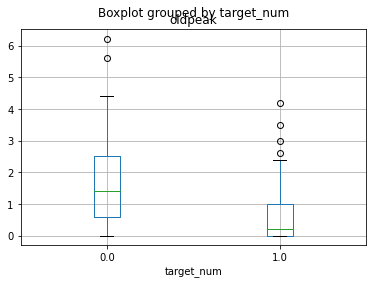

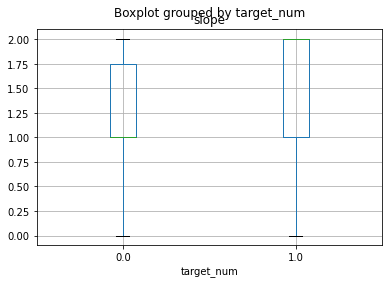

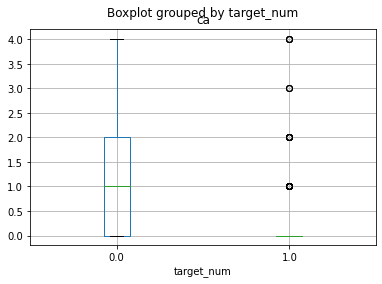

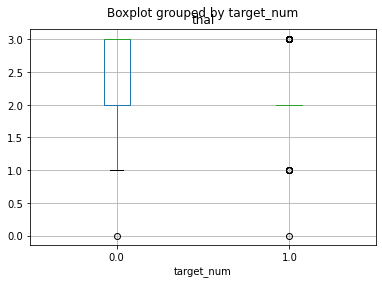

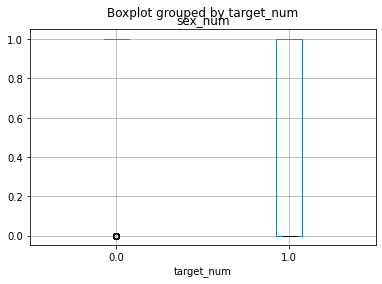

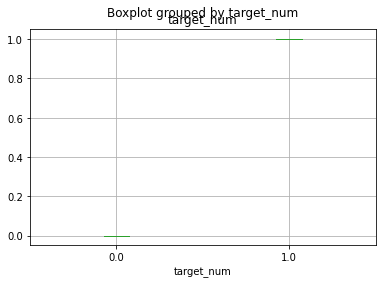

In [11]:
columns = list(df.columns.values)
for col in columns:
    print(col)
    if df.dtypes[col] != 'O':
        boxplot = df.boxplot(col,by="target_num")
    

Box plot shows many outliers. Lets try to see the 


ograms.

Unnamed: 0
age
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
sex_num
target_num


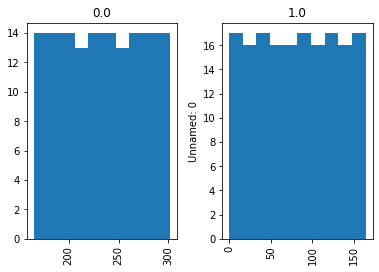

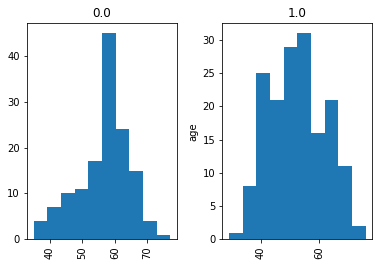

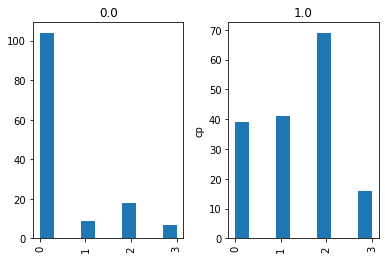

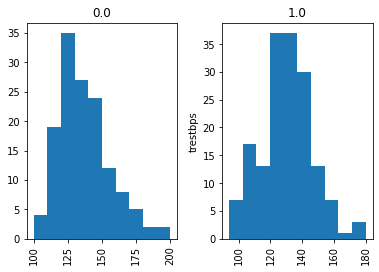

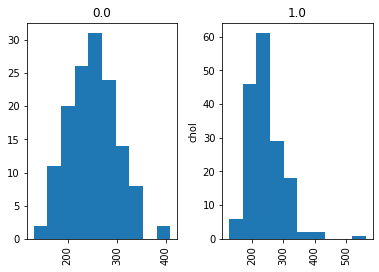

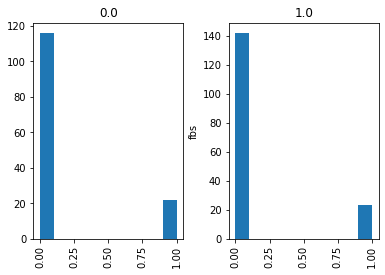

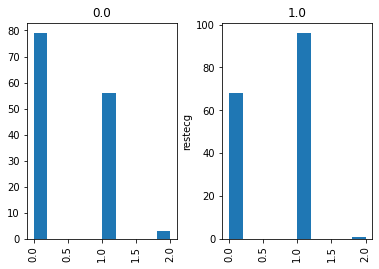

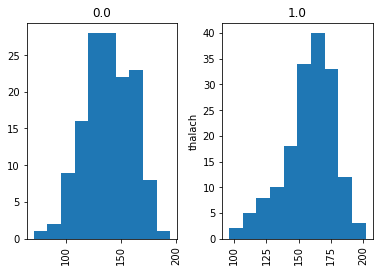

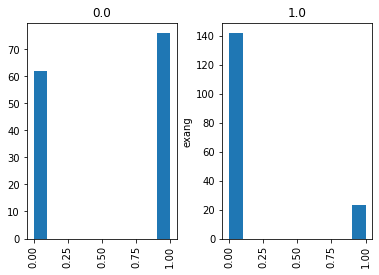

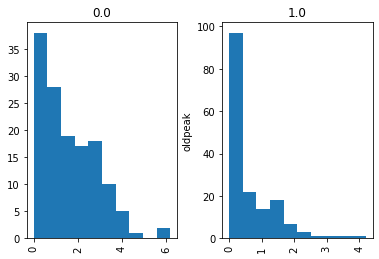

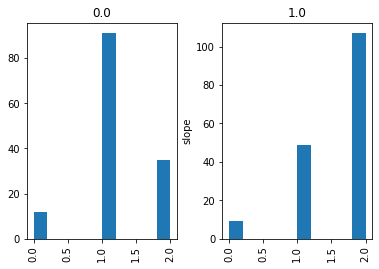

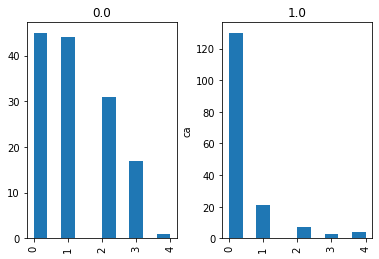

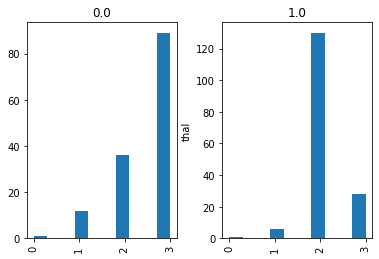

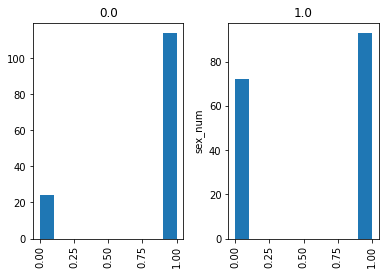

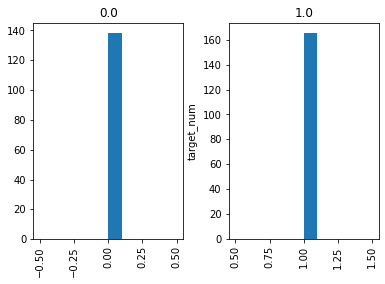

In [12]:
for col in columns:
    print(col)
    #if df.dtypes[col] != 'O':
    hist = df.hist(col,by="target_num")
    plt.ylabel(col)

The results shows that there are not much outliers.

# Checking the correlation among data

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_num,target_num
Unnamed: 0,1.000000,0.185153,-0.399163,0.101697,0.021571,0.000743,-0.021130,-0.394192,0.363788,0.298161,-0.276484,0.384962,0.257403,0.201132,-0.862585
age,0.185153,1.000000,-0.068653,0.279321,0.213441,0.121308,-0.116211,-0.395265,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.098447,-0.225439
cp,-0.399163,-0.068653,1.000000,0.047841,-0.077894,0.094444,0.044421,0.294571,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.049353,0.433798
trestbps,0.101697,0.279321,0.047841,1.000000,0.124985,0.175680,-0.110333,-0.033744,0.069590,0.193631,-0.120827,0.098237,0.060232,-0.063602,-0.141162
chol,0.021571,0.213441,-0.077894,0.124985,1.000000,0.012861,-0.150129,-0.026034,0.066309,0.053027,-0.003022,0.070798,0.098285,-0.197236,-0.086391
fbs,0.000743,0.121308,0.094444,0.175680,0.012861,1.000000,-0.084189,-0.007874,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.045032,-0.028046
restecg,-0.021130,-0.116211,0.044421,-0.110333,-0.150129,-0.084189,1.000000,0.030022,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.058196,0.137230
thalach,-0.394192,-0.395265,0.294571,-0.033744,-0.026034,-0.007874,0.030022,1.000000,-0.383205,-0.336662,0.372063,-0.209948,-0.098035,-0.048349,0.411339
exang,0.363788,0.096801,-0.394280,0.069590,0.066309,0.025665,-0.070733,-0.383205,1.000000,0.288223,-0.257748,0.115739,0.206754,0.141664,-0.436757
oldpeak,0.298161,0.210013,-0.149230,0.193631,0.053027,0.005747,-0.058770,-0.336662,0.288223,1.000000,-0.577537,0.222682,0.210244,0.096093,-0.430696


Correlation doesn't seem to be a problem. Only a few such as slope and oldpeak have more than 0.5 correlation.

# Classification

Now let's create a training and testing splits of data and do the first classification based on that.

In [14]:
label = df['target_num']
df_no_label = df.drop(columns=['target_num'])
df_no_label = df_no_label.drop(columns=['Unnamed: 0'])

X_train, X_test, y_train, y_test = train_test_split(df_no_label, label, test_size=0.2, random_state=42)

## Testing with SVM


0.9504132231404959
1.0
[0. 1.]


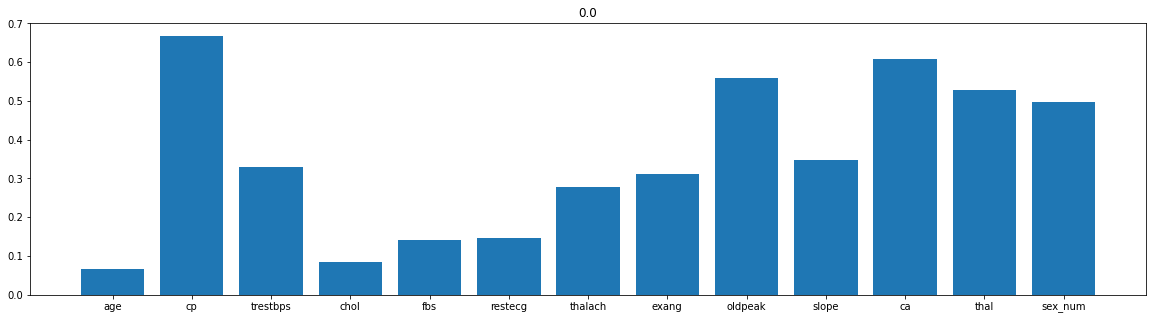

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
clf.fit(X_train, y_train)
dec = clf.decision_function(X_train)
np.shape(dec)
def evaluate(dec,y_train):
    dec = [1.0 if dec[i]>0 else 0  for i in range(0,len(dec)) ]
    n_errors = np.abs(np.sum(dec-y_train))
    acc = (len(dec)-n_errors)/len(dec)
    print(acc)
evaluate(dec,y_train)
dec_test = clf.decision_function(X_test)
evaluate(dec_test,y_test)
dec_test = [1.0 if dec_test[i]>0 else 0  for i in range(0,len(dec_test)) ]

def plot_coeffs(clf,X_train):
  columns = list(X_train.columns.values)
  plt.figure(figsize=(20,5))
  plt.bar(columns,np.abs(clf.coef_[0,:]))
  plt.title(clf.classes_[0])

  print(clf.classes_)
plot_coeffs(clf[1],X_train)


In [16]:
X_train.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_num
132,42,1,120.0,295.0,0,1,162.0,0,0.0,2,0,2,1.0
202,58,0,150.0,270.0,0,0,111.0,1,0.8,2,0,3,1.0
196,46,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2,1.0
75,55,1,135.0,250.0,0,0,161.0,0,1.4,1,0,2,0.0
176,60,0,117.0,230.0,1,1,160.0,1,1.4,2,2,3,1.0


# Check Logistic Regression

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

LR_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

LR = LR_pipe.fit(X_train, y_train)
dec_train_LR = LR.predict(X_train)
dec_test_LR = LR.predict(X_test)

evaluate(dec_train_LR,y_train)
evaluate(dec_test_LR,y_test)



0.9545454545454546
0.9836065573770492


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8524590163934426}

Check some of the parameters with respect to the target.

In [19]:
pd.crosstab(df["sex_num"], df["target_num"])

target_num,0.0,1.0
sex_num,,
0.0,24,72
1.0,114,93


In [20]:
pd.crosstab(df["age"], df["target_num"])

target_num,0.0,1.0
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7
